# III. Data Analysis
## Assignment 2
### Data Analysis on Climate Change on Crop
### Step 1: Set up the Environment
- Start by importing all the necessary libraries like `pandas`, `matplotlib`, `seaborn`, and `scikit-learn`.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Step 2: Loading the Data
- Load your CSV file into a Pandas DataFrame for further analysis.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('processed_climate_change_data.csv')

# Display the first few rows of the dataset
df.head()

# Get a summary of the dataset to understand its structure
df.info()

# Get basic statistics for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             1000 non-null   float64
 1   Precipitation           1000 non-null   float64
 2   CO2 Levels              1000 non-null   float64
 3   Crop Yield              1000 non-null   float64
 4   Soil Health             1000 non-null   float64
 5   Extreme Weather Events  1000 non-null   object 
 6   Crop Disease Incidence  1000 non-null   object 
 7   Water Availability      1000 non-null   object 
 8   Food Security           1000 non-null   object 
 9   Economic Impact         1000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 78.3+ KB


,Temperature,Precipitation,CO2 Levels,Crop Yield,Soil Health
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-1.065814e-16,-5.329071e-17,-6.750156e-17,1.669775e-16,-1.159073e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.685037e+00,-1.607328e+00,-1.785258e+00,-1.709182e+00,-1.587532e+00
25%,-8.803713e-01,-9.027273e-01,-8.224584e-01,-8.651356e-01,-8.846179e-01
50%,-8.650156e-03,3.187478e-03,3.530848e-02,1.929796e-03,1.697538e-01
75%,9.301264e-01,8.084451e-01,8.755699e-01,8.546081e-01,8.726683e-01
max,1.667737e+00,1.747912e+00,1.715831e+00,1.743734e+00,1.575583e+00


### Step 3: Data Visualization to Uncover Patterns
#### 3.1: Distribution of Numerical Variables
- We have several numerical features like Temperature, Precipitation, CO2 Levels, and Crop Yield. Visualizing their distributions can help us understand how these variables are spread.

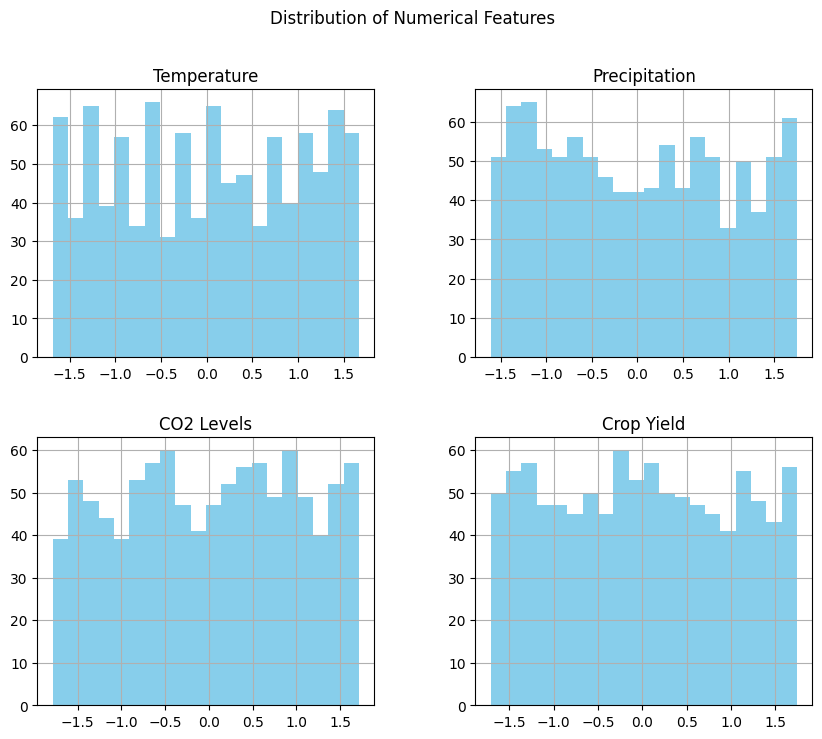

In [2]:
import matplotlib.pyplot as plt

# Plot histograms for all numerical columns
df[['Temperature', 'Precipitation', 'CO2 Levels', 'Crop Yield']].hist(figsize=(10, 8), bins=20, color='skyblue')
plt.suptitle('Distribution of Numerical Features')
plt.show()


#### 3.2: Correlation Analysis
- Correlation analysis helps identify relationships between numerical variables. We plot a correlation heatmap to easily visualize these relationships.

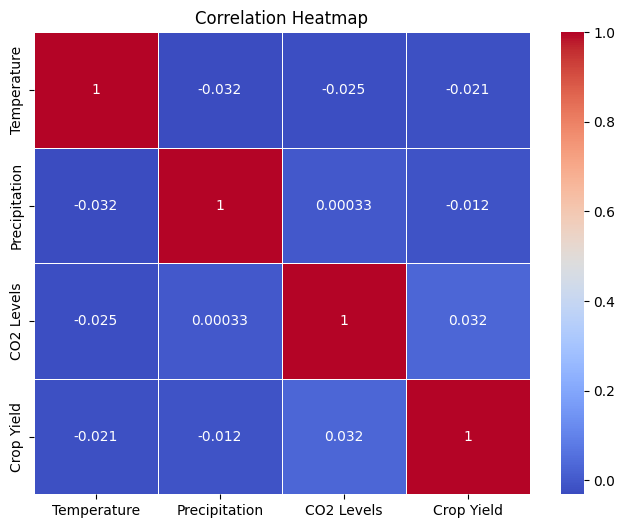

In [3]:
import seaborn as sns

# Calculate correlation matrix for numerical columns
corr_matrix = df[['Temperature', 'Precipitation', 'CO2 Levels', 'Crop Yield']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


- High correlations (close to 1 or -1) between features may indicate that one variable can predict another. For example, high CO2 Levels might correlate with Crop Yield.

### Step 4: Analyze Categorical Variables
#### 4.1: Bar Charts for Categorical Variables
Bar charts can help show how frequently different categories appear in the dataset.

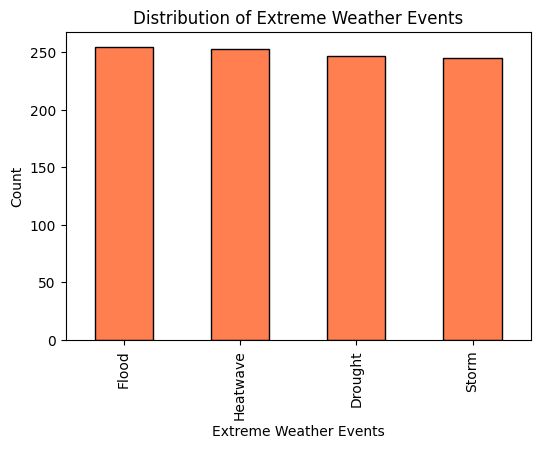

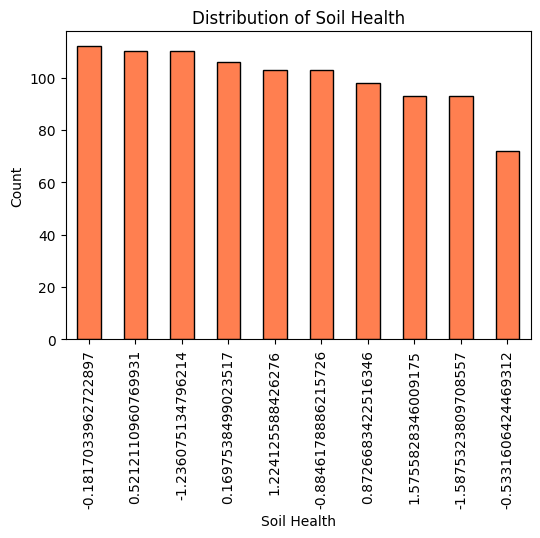

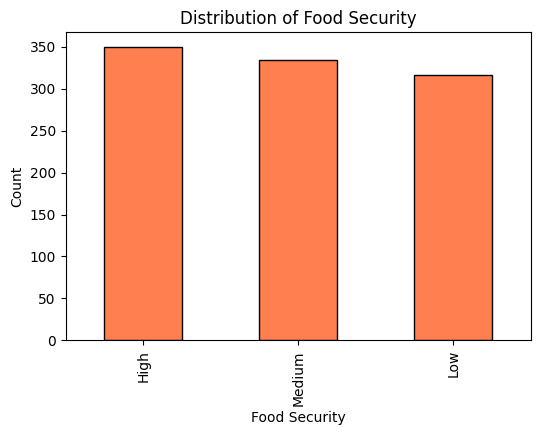

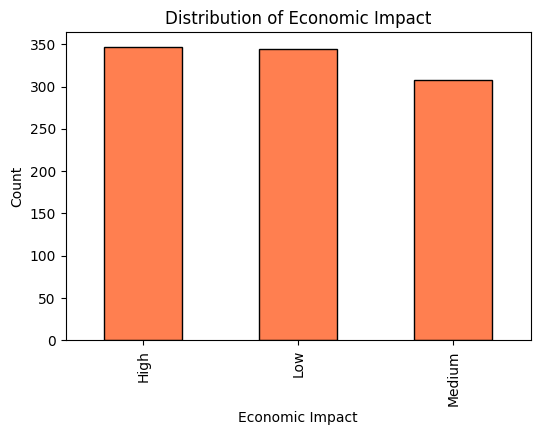

In [4]:
# Plot bar charts for categorical variables
categorical_columns = ['Extreme Weather Events', 'Soil Health', 'Food Security', 'Economic Impact']

for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar', color='coral', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


### Step 5: Analyze Relationships Between Categorical and Numerical Data
#### 5.1: Box Plots
Box plots can show how a categorical variable (e.g., Extreme Weather Events) affects a numerical variable (e.g., Crop Yield).

/var/folders/gv/rtnszm0j6zv_rcttl_93t75r0000gn/T/ipykernel_23424/65606826.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Extreme Weather Events', y='Crop Yield', data=df, palette='Set2')


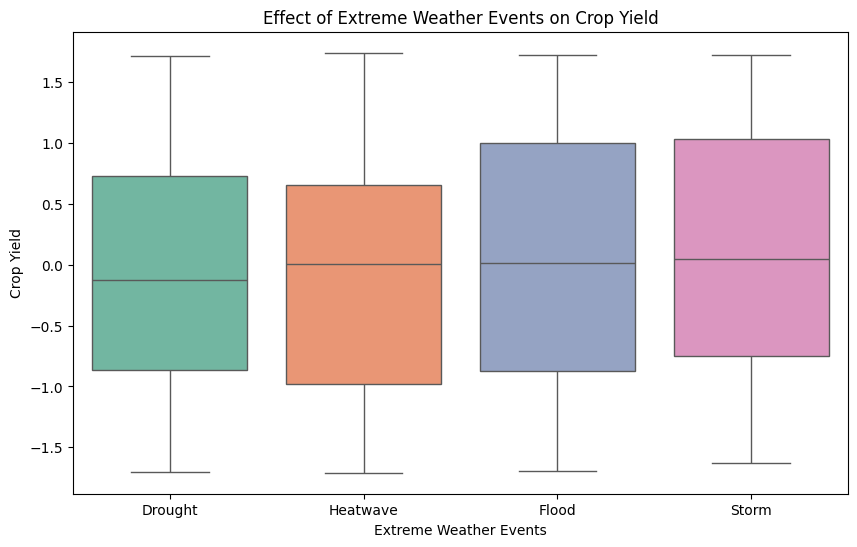

In [5]:
# Box plot to visualize the effect of Extreme Weather Events on Crop Yield
plt.figure(figsize=(10, 6))
sns.boxplot(x='Extreme Weather Events', y='Crop Yield', data=df, palette='Set2')
plt.title('Effect of Extreme Weather Events on Crop Yield')
plt.show()


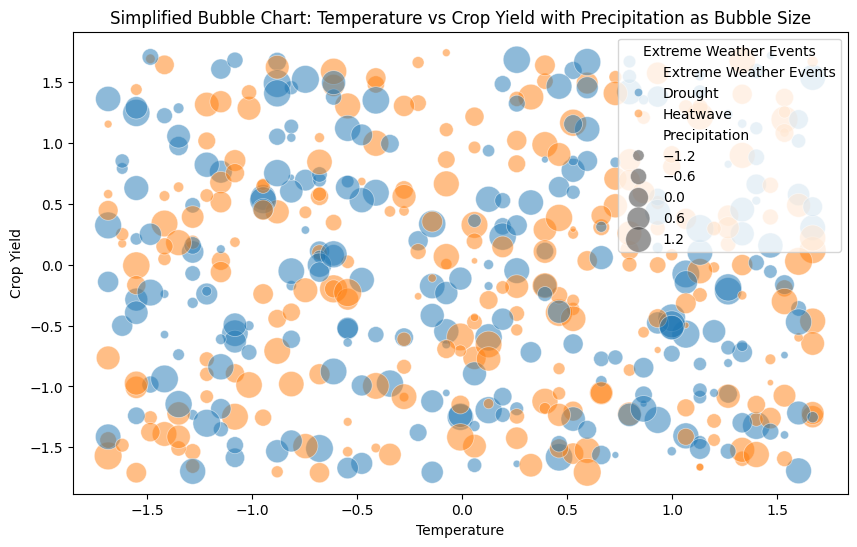

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter dataset to reduce clutter (e.g., include only 'Drought' and 'Heatwave' events)
df_filtered = df[df['Extreme Weather Events'].isin(['Drought', 'Heatwave'])]

# Create a bubble chart with reduced bubble size and increased transparency
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='Temperature', y='Crop Yield', size='Precipitation', hue='Extreme Weather Events', 
                sizes=(20, 400), alpha=0.5)  # Reduce size range and increase transparency

# Customize the chart
plt.title('Simplified Bubble Chart: Temperature vs Crop Yield with Precipitation as Bubble Size')
plt.xlabel('Temperature')
plt.ylabel('Crop Yield')

# Show legend and plot
plt.legend(title='Extreme Weather Events', loc='upper right')
plt.show()


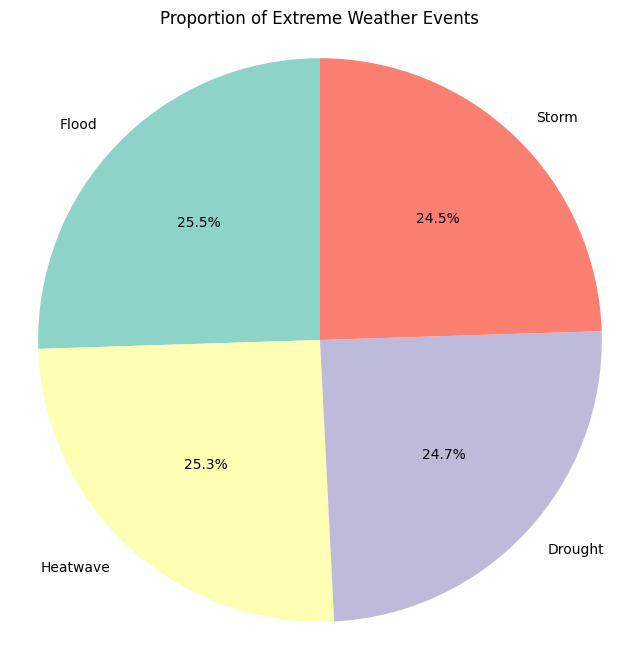

In [10]:
import matplotlib.pyplot as plt

# Count the occurrences of each Extreme Weather Event
weather_event_counts = df['Extreme Weather Events'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(weather_event_counts, labels=weather_event_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))

# Customize the plot
plt.title('Proportion of Extreme Weather Events')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.show()
